In [14]:
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
eval_set = [(X_train, y_train),
            (X_test, y_test)]
cat = CatBoostClassifier(thread_count=-1, verbose=False, allow_writing_files=False, random_state=2)
cat.fit(X_train, y_train,
        eval_set=eval_set,  # ==>xgboost
        early_stopping_rounds=100)  # ==>xgboost

result = cat.predict(X_test)
result

array([[2],
       [5],
       [7],
       [5],
       [1],
       [2],
       [5],
       [2],
       [5],
       [3],
       [2],
       [5],
       [5],
       [6],
       [2],
       [6],
       [5],
       [5],
       [2],
       [1],
       [5],
       [2],
       [2],
       [3],
       [5],
       [5],
       [2],
       [5],
       [4],
       [2],
       [2],
       [2],
       [2],
       [5],
       [2],
       [1],
       [5],
       [1],
       [2],
       [2],
       [7],
       [5],
       [5],
       [1],
       [5],
       [1],
       [2],
       [2],
       [5],
       [2],
       [5],
       [6],
       [1],
       [6],
       [1],
       [5],
       [5],
       [6],
       [2],
       [5],
       [1],
       [7],
       [2],
       [4],
       [2],
       [5],
       [5],
       [2],
       [3],
       [5],
       [5],
       [1],
       [7],
       [2],
       [2],
       [2],
       [6],
       [5],
       [2],
       [5],
       [2],
       [5],
       [5],
    

In [17]:
result.shape

(750, 1)

In [18]:
# 预测结果可以输出为概率向量
result_pro = cat.predict_proba(X_test) # 仅分类算法
result_pro

array([[3.68255868e-01, 6.22930753e-01, 1.43026475e-04, ...,
        7.83462925e-03, 1.67399277e-04, 5.76642122e-04],
       [6.68347489e-03, 1.72241536e-02, 7.41140256e-05, ...,
        9.75743861e-01, 3.98796235e-05, 1.88668804e-04],
       [2.93243841e-02, 1.42646345e-03, 2.37314176e-05, ...,
        4.53245548e-05, 8.10557946e-06, 9.69164333e-01],
       ...,
       [8.69978951e-02, 7.96812147e-01, 1.43050910e-04, ...,
        1.14021634e-01, 1.64482577e-04, 1.82444194e-03],
       [4.98264937e-05, 3.68523621e-03, 8.75587752e-05, ...,
        9.96080394e-01, 7.16056695e-05, 1.13535629e-05],
       [3.96840939e-01, 6.02019987e-01, 2.77525175e-05, ...,
        8.52647925e-04, 4.68174367e-05, 1.96355162e-04]])

In [19]:
result_pro.shape

(750, 7)

In [20]:
cat.score(X_test, y_test)  # 精度

0.844

In [21]:
cat.feature_importances_  # 特征的相对重要性

array([2.38439557e+01, 3.53233773e+00, 4.35352055e+00, 6.90974295e+00,
       5.43032415e+00, 1.40168234e+01, 5.14409810e+00, 4.67728034e+00,
       3.07566731e+00, 1.20987721e+01, 6.59089482e+00, 0.00000000e+00,
       9.34348509e-01, 4.66899789e+00, 1.24211993e-01, 6.33039841e-02,
       1.68697507e-02, 7.01829976e-03, 2.46328552e-02, 3.19582556e-02,
       0.00000000e+00, 0.00000000e+00, 2.97680011e-03, 3.13152915e-01,
       3.07822718e-02, 6.67252200e-01, 9.24452465e-02, 1.66858029e-03,
       0.00000000e+00, 4.48849635e-02, 1.22103889e-01, 2.43413597e-02,
       1.22915335e-02, 4.19811922e-01, 0.00000000e+00, 5.87118084e-02,
       5.32561476e-01, 8.25461316e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.72757504e-04, 8.84822123e-01, 1.00019265e+00,
       1.36609043e-02, 6.90105193e-03, 1.17601168e-01, 4.31273809e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16468460e-02,
       0.00000000e+00, 0.00000000e+00])

In [22]:
'''
Return the feature importances as a list of the following pairs sorted by feature importance:
(feature_id, feature importance)
'''
cat.get_feature_importance(prettified=True)  # 默认prettified=False

,Feature Id,Importances
0,0,23.843956
1,5,14.016823
2,9,12.098772
3,3,6.909743
4,10,6.590895
5,4,5.430324
6,6,5.144098
7,7,4.677280
8,13,4.668998
9,2,4.353521


In [23]:
evals_result = cat.evals_result_  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'learn': {'MultiClass': [1.7349789702721854,
   1.5774944087905816,
   1.456038103734436,
   1.3653741860766533,
   1.2844097121952434,
   1.2099754055125636,
   1.1447251559247444,
   1.0916423667678326,
   1.0471434952419545,
   1.0043982992503253,
   0.9690018457939318,
   0.9400024326300924,
   0.9063009899310276,
   0.87612907015861,
   0.8566307326818636,
   0.8336497771017357,
   0.8137249983233106,
   0.7950998183196661,
   0.779498396979624,
   0.7602681634797394,
   0.7426045692910679,
   0.7308001164180714,
   0.7148517439805755,
   0.7009007966318951,
   0.690421614149084,
   0.6798800394773085,
   0.6677387696178327,
   0.6599008273974629,
   0.6507692936133761,
   0.6395805524012752,
   0.6281463875714036,
   0.6217820078664893,
   0.6126648498576752,
   0.6064397539818439,
   0.6015689127515321,
   0.5952055097832084,
   0.589005542975053,
   0.5821710221570078,
   0.5777919273944412,
   0.5706430162739152,
   0.566744357636767,
   0.5618101444183858,
   0.5566427147386

In [24]:
# 第一个为训练数据集的评估结果
# 后面(第二个开始)根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result.keys()

dict_keys(['learn', 'validation_0', 'validation_1'])

In [25]:
train_evals = evals_result['validation_0']['MultiClass']
test_evals = evals_result['validation_1']['MultiClass']

Text(0.5, 0, 'rounds')

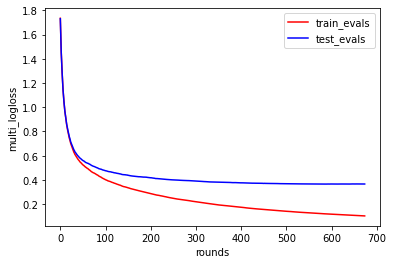

In [26]:
plt.plot(train_evals, label='train_evals', color='red')
plt.plot(test_evals, label='test_evals', color='b')
plt.legend()
plt.ylabel('multi_logloss')
plt.xlabel('rounds')